# Сборный проект

## Описание проекта, Описание данных

### Описание проекта

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br>

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
<br>

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

- <b>Name</b> — название игры
- <b>Platform</b> — платформа
- <b>Year_of_Release</b> — год выпуска
- <b>Genre</b> — жанр игры
- <b>NA_sales</b> — продажи в Северной Америке (миллионы проданных копий)
- <b>EU_sales</b> — продажи в Европе (миллионы проданных копий)
- <b>JP_sales</b> — продажи в Японии (миллионы проданных копий)
- <b>Other_sales</b> — продажи в других странах (миллионы проданных копий)
- <b>Critic_Score</b> — оценка критиков (максимум 100)
- <b>User_Score</b> — оценка пользователей (максимум 10)
- <b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
<br>

Данные за 2016 год могут быть неполными.

## Шаг 1. Ознакомление с данными / Изучение данных

### Импорт данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st


In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.shape

(16715, 11)

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Сразу видно много пропусков и странные типы..Чтож посмотрим поближе

## Шаг 2. Подготовка данных

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:

- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Заменим названия столбцов (приведение к нижнему регистру)

In [6]:
games.columns = games.columns.str.lower()

In [7]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проверили, изменились

### Преобразуем данные в нужные типы

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- year_of_release in INT | Год измеряется целочисленно
- critic_score in INT | После запятой у них нет значений кроме 0, так что округлим до целых
- user_score in FLOAT | У них есть значения после запятой, нужно перевести в числа, а именно float

In [9]:
# Заменим годы и оценки критиков в целочисленный тип
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')


# Заменим тип оценки пользователей на float
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'ignore')

### Обработаем пропуски при необходимости:

1. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
2. Опишите причины, которые могли привести к пропускам;
3. Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [10]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Отсутствуют 2 значения в name - удалим, 269 значений в year_of_release - тоже удалим, небольшое значение, так что не повлияет на анализ.

Почти половина данных отсутствует по столбцам critic_score,user_score и rating. Подумаем о причинах и решениях:
- critic_score и user_score эти оценки могли просто не существовать, то есть либо они достаточно старые, и тогда этого могли не делать, либо они новые. Также есть вероятность, что эти игры не так распространены или имеют очень маленькое количество оценок для использования их средней. 
- заполнять эти столюцы средним или медианой просто не имеет смысла, так как пропусков очень много, они могут значительно повлиять на анализ. Оставим пропусками, но в дальнейшем при рассмотрении зависимостей, связанных с этими колонками, будем брать только существующие значения.
- rating - рейтинг от ESRB. Эта организация была создана в 1994 году, соответственно все игры до этого периода с большой вероятностью не будут иметь этих оценок. Заполнять их вручную, просматривая каждую игру, смысла нет, так как это затратно по времени. Поступать будем также, что и с рейтингами критиков и пользователей.

проверим, преимущественно ли по старым играм есть все эти пропуски:

In [11]:
games.query('critic_score.isnull() & rating.isnull() & user_score.isnull()')#.sort_values(by='year_of_release', ascending = False).head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Предположение верно частично. Но и по довольно новым играм есть такие пропуски (и не в самый последний год).

***

Помимо пропусков, видим "tbd". Посмотрим, сколько их там таких:

In [12]:
len(games[games['user_score'] == 'tbd'])

2424

tbd это аббревиатура от To Be Determined. Пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.
Вероятнее всего это подходит для новых или не популярных игр. Либо просто не оставляют отзывы именно на том сайте, где и были собраны данные рейтинги.

Но числовой тип столбца нам необходим. Т.к. 'tbd' фактически и является NaN, заменим  'tbd' на Nan:

In [13]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

In [14]:
#Так как в первом случае при ошибках я ставила игнорировать, то тип не поменялся из-за этих tbd.
#Проведем данную операцию еще раз
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'ignore')

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Теперь все сработало.

***

Удалим строки с пустым значением name, genre. Они не изменят общую статистическую картину.

In [16]:
games = games.dropna(subset=['name', 'genre']).reset_index(drop=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


посмотрим на данные с отсутствием year_of_release:

In [17]:
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Вообще названия игр могут совпадать и для нескольких платформ будет один и тот же выпуск, но в целом пустых данных всего 269 их можно удалить из анализа.

In [18]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)

## Шаг 3. Исследовательский анализ данных (EDA)

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посчитаем продажи и общее количество выпущенных игр в новых столбцах, затем сгруппируем:

In [19]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [20]:
sales = games.groupby('year_of_release')[['total_sales']].sum()
number = games.groupby('year_of_release')[['name']].count()
games_s = sales.join(number)
games_s.columns = ['total_sales', 'number_of_games']

<div class="alert alert-warning"; style="border-left: 7px solid gold"> 
    
    `pivot = df.groupby('column_1').agg({'column2': 'агрегирующая функция', 'column_3': 'агрегирующая функция'}).reset_index()`
    

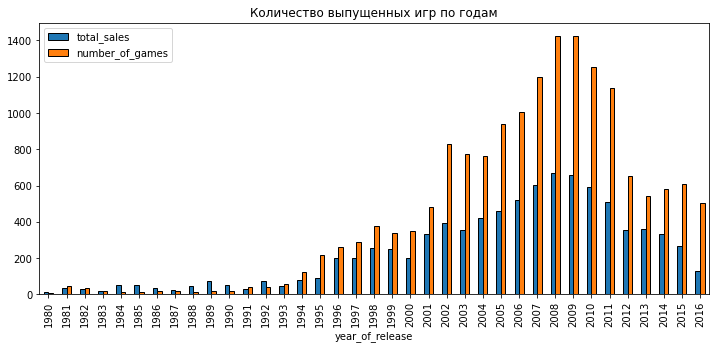

In [21]:
games_s.plot(title = 'Количество выпущенных игр по годам', kind='bar', ec='black', figsize = (12,5))
plt.show()

Можно заметить две точки перелома, начиная с которых тренд сильно меняется на растущий - это 1994 и 2000 гг.

До 1994 года игр практически не было. Потом они начали появляться. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Максимальные значения были в 2008-2009 годах. После этого произошло резкое падение, предположительно связанное с развитием мобильных устройств. Это и повлекло за собой снижение интереса к играм, и в итоге к выпуску новых игр.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [22]:
sales_p = games.groupby('platform').agg({'total_sales':'sum'}).sort_values(by = 'total_sales')#[-6:]

<AxesSubplot:title={'center':'Количество проданных игр по платформам'}, xlabel='platform'>

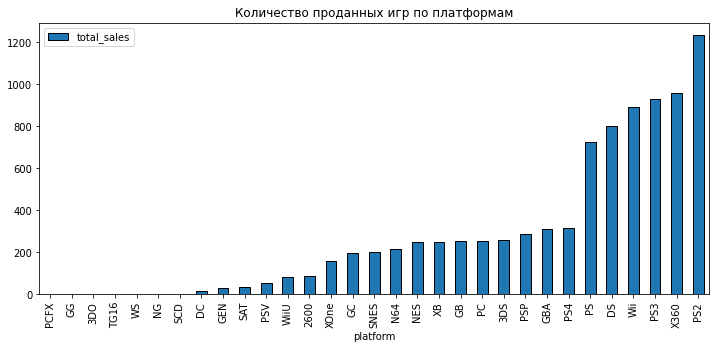

In [23]:
sales_p.plot(title = 'Количество проданных игр по платформам', kind='bar', ec='black', figsize = (12,5))

Для выборки возьмем первые 6 платформ, они сильно выделяются на фоне остальных. 

Сначала сгруппируем новую таблицу с годами и сделаем срез для 6 платформ.

In [24]:
platform_years = pd.DataFrame(games.groupby(['platform','year_of_release'])['total_sales'].sum())
platforms_six = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
#platforms_best = platform_years.query('year_of_release>1992')
platforms_best = platform_years.query('platform in @platforms_six').reset_index()
platforms_best

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
...,...,...,...
62,X360,2012,99.74
63,X360,2013,88.58
64,X360,2014,34.74
65,X360,2015,11.96


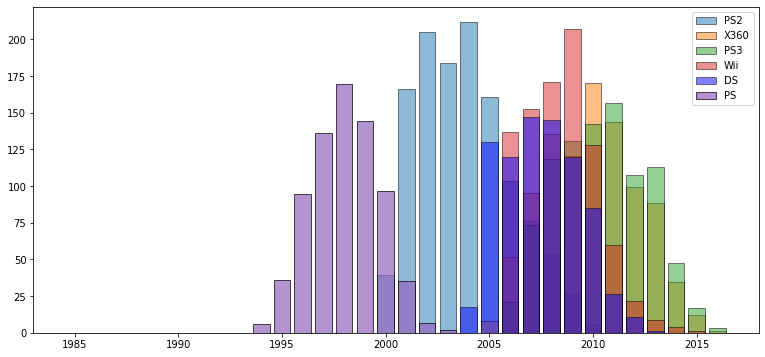

In [25]:
x1 = platforms_best[platforms_best['platform']=='PS2']['year_of_release']
x2 = platforms_best[platforms_best['platform']=='X360']['year_of_release']
x3 = platforms_best[platforms_best['platform']=='PS3']['year_of_release']
x4 = platforms_best[platforms_best['platform']=='Wii']['year_of_release']
x5 = platforms_best[platforms_best['platform']=='DS']['year_of_release']
x6 = platforms_best[platforms_best['platform']=='PS']['year_of_release']

y1 = platforms_best[platforms_best['platform']=='PS2']['total_sales']
y2 = platforms_best[platforms_best['platform']=='X360']['total_sales']
y3 = platforms_best[platforms_best['platform']=='PS3']['total_sales']
y4 = platforms_best[platforms_best['platform']=='Wii']['total_sales']
y5 = platforms_best[platforms_best['platform']=='DS']['total_sales']
y6 = platforms_best[platforms_best['platform']=='PS']['total_sales']

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x1, y1, alpha = 0.5,ec='black', label='PS2')
ax.bar(x2, y2, alpha = 0.5,ec='black', label='X360')
ax.bar(x3, y3, alpha = 0.5,ec='black', label='PS3')
ax.bar(x4, y4, alpha = 0.5,ec='black', label='Wii')
ax.bar(x5, y5, alpha = 0.5,ec='black', label='DS',color='b')
ax.bar(x6, y6, alpha = 0.7,ec='black', label='PS')

plt.legend()

Что-то плоховато видно, лучше разделить на отдельные графики.

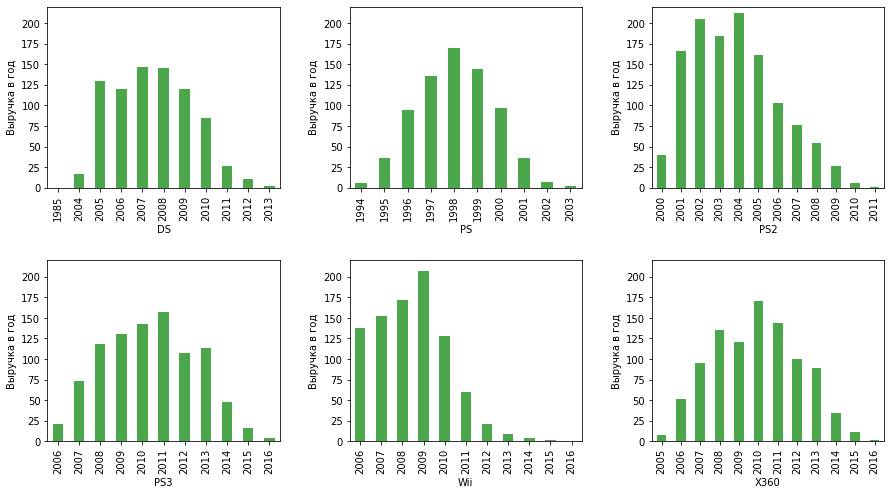

In [27]:
plt.figure(figsize = (15, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

def draw_graph(i, plat):
    plt.subplot(2, 3, i)
    platforms_best.query('platform == @plat').groupby('year_of_release')['total_sales'].sum()\
                 .plot( kind='bar', color='g', alpha = 0.7)
    plt.xlabel(plat)
    plt.ylabel('Выручка в год')
    plt.ylim(0, 220)

def create_graphs():
    i = 1
    for pl in platforms_best['platform'].unique():
        draw_graph(i, pl)
        i += 1
        
create_graphs()

<div class="alert alert-success"; style="border-left: 7px solid green">
<b> или так</b> 
    

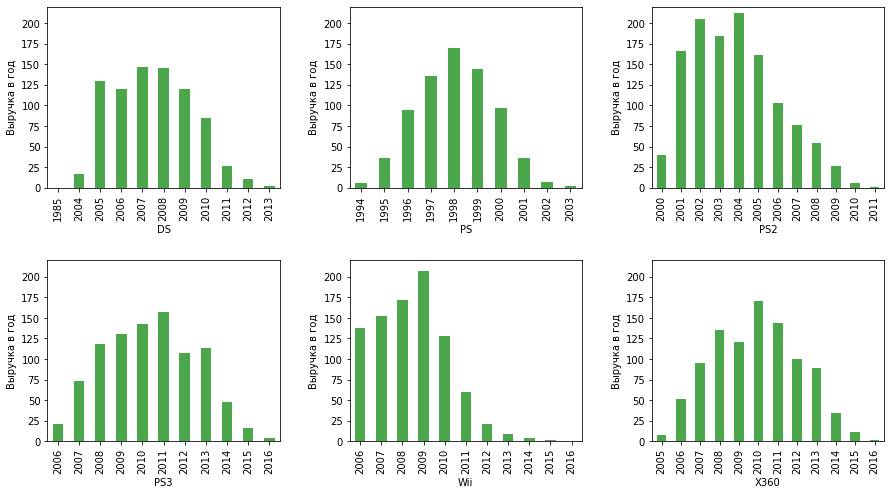

In [28]:
plt.figure(figsize = (15, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

i = 0

for platform in platforms_best['platform'].unique():

    i += 1
    plt.subplot(2, 3, i)
    platforms_best.query('platform == @platform').groupby('year_of_release')['total_sales'].sum()\
                 .plot( kind='bar', color='g', alpha = 0.7)
    plt.xlabel(platform)
    plt.ylabel('Выручка в год')
    plt.ylim(0, 220)



В среднем каждая из платформ просуществовала примерно по 10 лет. Но так как они постоянно модифицируются и создаются новые, старым, увы, места не остается.
- PS2 с 2000 по 2010 (в точности 10 лет)
- X360 с 2005 по 2015 (10 лет)
- PS3 с 2006 по 2016 (10 лет)
- Wii с 2006 по 2014(2015) (8-9 лет)
- DS с 2004 по 2013 (9 лет)
- PS с 1994 по 2003 (9 лет)


### Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [29]:
games= games[games['year_of_release']>=2013]
# обновим нашу таблицу, так как было сказано не учитывать данные за прошлые года


### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

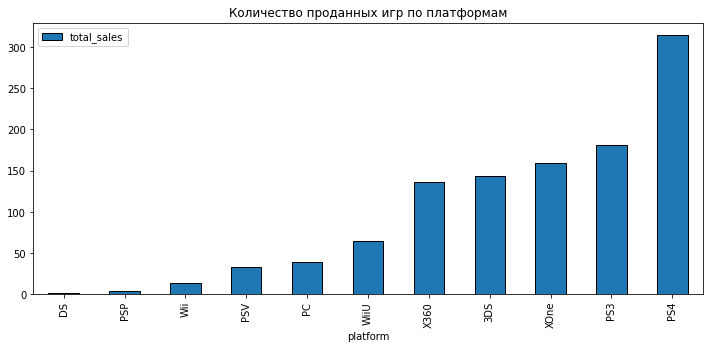

In [30]:
sales_plat_new = games.groupby('platform').agg({'total_sales':'sum'}).sort_values(by = 'total_sales')
sales_plat_new.plot(title = 'Количество проданных игр по платформам', kind='bar', ec='black', figsize = (12,5))
plt.legend()
plt.show()

Если рассматривать в целом только продажи, то лидирующими являются 4 платформы : X360, PS3, Wii и DS.

Теперь посмотрим, что происходит с продажами по годам.

<div class="alert alert-block alert-info"; style="border-left: 7px solid blue">
<b>Комментарий студента</b>
    
По продажам явно лидирует PS4, и за ним идет четверка : PS3, XOne, 3DS, X360.
</div>

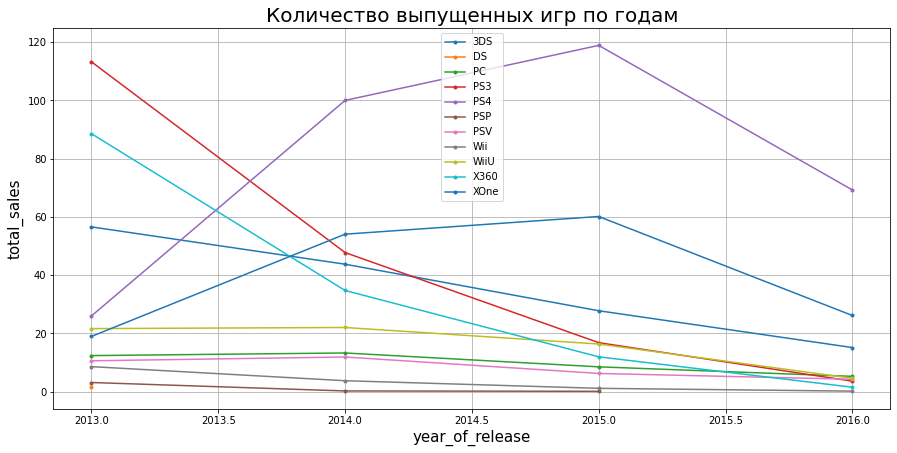

In [31]:
platform_years_new = pd.DataFrame(games.groupby(['platform','year_of_release'])['total_sales'].sum()).reset_index()
#platforms_six = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
#platforms_best = platform_years.query('year_of_release>1992')
#platforms_best = platform_years.query('platform in @platforms_six').reset_index()
#platforms_best

fig, ax = plt.subplots( figsize=(15, 7)) 
for platform, group_data in platform_years_new.groupby('platform'):
    ax.plot(group_data['year_of_release'],group_data['total_sales'] ,'.-',label =  platform,  linewidth=1.5)
    ax.set_title('Количество выпущенных игр по годам' , size = 20)
    ax.set_xlabel('year_of_release', size = 15)
    ax.set_ylabel('total_sales', size= 15)
    plt.grid()
    plt.legend()
    
    #plt.show()

В целом продажи по всем платформам падают. 

Сравнивая с первоначальной оценкой, X360, PS3, Wii и DS, все эти платформы можно сказать уже "отжили" свое, и их продажи практически на минимуме. Однако выбиваются относительно новые платформы, такие как:
- PS4
- XOne
- 3DS

<div class="alert alert-block alert-info"; style="border-left: 7px solid blue">
    
По сравнению с первоначальным анализом, PS4 также остается в лидерах, а из четверки еще "держатся" только XOne и 3DS.
    
<div class="alert alert-success"; style="border-left: 7px solid green"> 
    
Помним, что стоит смотреть не только на количественные данные, но еще углубляться в специфику. Вот здесь, например, если знать предметную область, то можно увидеть, что 3DS и PSV - это мобильные платформы с изначально меньшей аудиторией, но тем не менее это отдельный сегмент. А у РС уже давно невысокие, но тем не менее стабильные продажи.  
    
</div>

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

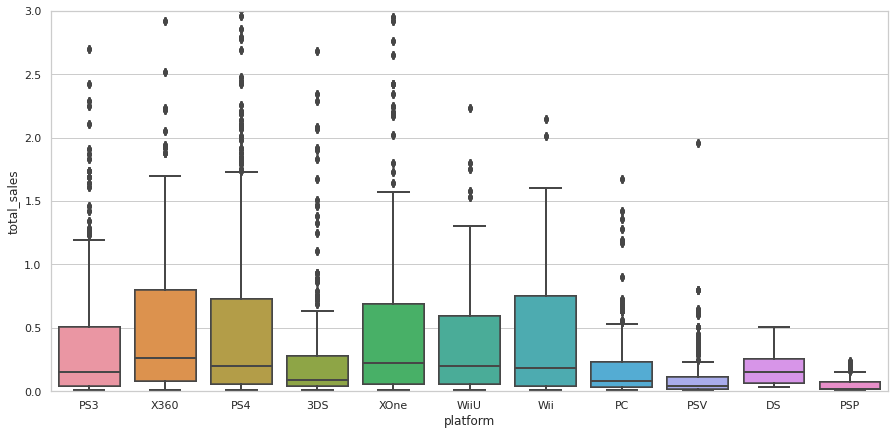

In [33]:
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots( figsize=(15, 7)) 
for platform, group_data in games.groupby('platform'):
    #ax.plot(group_data['year_of_release'],group_data['total_sales'] ,'boxplot',label =  platform)
    ax = sns.boxplot(x="platform", y="total_sales", data=games)
    plt.ylim(0, 3)


<div class="alert alert-block alert-info"; style="border-left: 7px solid blue">
    
Наибольшие медианные значения продаж у платформ X360, XOne, PS4, WiiU и Wii. Они варьируются от 0,18 до 0,27 млн проданных копий.
    
У остальных платформ <= 0.15 млн.
                           
Максимальные значения у платформ доходят до 10-20 млн, таких как PS3, X360, PS4, 3DS.

В целом, практически у всех платформ есть как игры с очень низкими значениями по продажам, так и единичные игры с оочень высокими продажами.
    
                           
<div class="alert alert-success"; style="border-left: 7px solid green">
    
В идеале, стоило построить два графика: один без ограничения, чтобы увидеть весь диапазон, а второй с ограничением лучше до 2, чтобы медианы и другие характеристики распределения было лучше видно.
    
    
</div>


У всех лидирующих платформ присутствует большой разброс от самых маленьких продаж до высоких. Т.е. бывают и очень успешные игры, и совсем "не очень".

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Для оценки влияния возьмем платформу PS3. Сначала выведем все необходимые колонки, и для более точного результата возьмем все оценки больше нуля.

In [34]:
ps3_corr = games[games.platform == "PS3"].loc[:,['total_sales', 'critic_score', 'user_score']]
ps3_corr = ps3_corr[(ps3_corr['critic_score']>0) & (ps3_corr['user_score']>0)].reset_index(drop=True)
ps3_corr.head(10)

,total_sales,critic_score,user_score
0,21.05,97,8.2
1,9.36,71,2.6
2,6.46,86,4.3
3,5.86,95,9.1
4,3.71,88,8.1
5,3.49,80,5.8
6,3.23,81,7.7
7,2.29,76,7.7
8,2.25,80,7.5
9,2.11,84,4.9


Диаграмма рассеяния для PS3


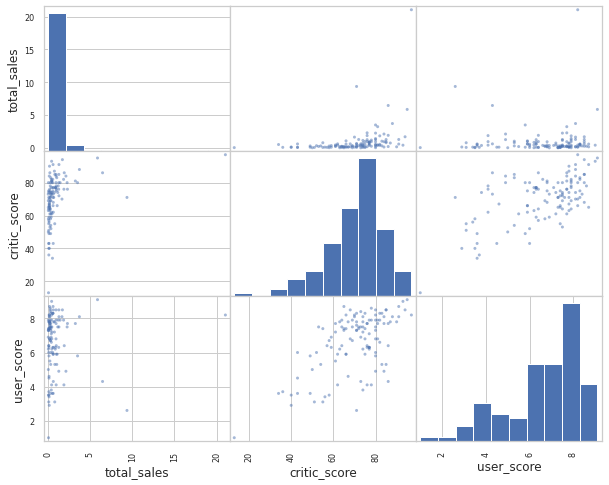

In [35]:
print("Диаграмма рассеяния для PS3")
pd.plotting.scatter_matrix(ps3_corr, figsize=(10, 8))
plt.show()

Существует  не очень явно выраженная прямая корреляция между продажами и рейтингом критиков.

Однако корреляции между продажами и рейтингом пользователей особой корреляции не наблюдается.

Что следует заметить, что рейтинги между собой зависимы. Скорее всего на рейтинг пользователей влияет оценка критиков.

В итоге: у игр с высоким рейтингом критиков продажи больше.

In [36]:
ps3_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.333807,0.022691
critic_score,0.333807,1.000000,0.599920
user_score,0.022691,0.599920,1.000000


Корреляция между total_sales и critic_score равна 0.33, что ожидаемо, мы заметили эту зависимость на графике.

Корреляции между total_sales и user_score практически отсутствует.

Корреляция между critic_score и user_score равна 0.6, что подтверждает влияние критиков на простых пользователей.

<div class="alert alert-danger"; style="border-left: 7px solid red">

И расчет корреляции и построение диаграмм нужно делать на данных за актуальный период. Ты же пытаешься найти взаимосвязи, которые помогут тебе сделать прогноз на следующий год.
    
Тебе нужно было рассмотреть влияние на данных по одной *перспективной* платформе, а потом сделать аналогичное для каждой из оставшихся *перспективных* платформ.
    

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [37]:
group_genre = pd.pivot_table(games, index='genre', values='total_sales', aggfunc='sum')
group_genre.sort_values('total_sales', ascending=False).style.bar()

,total_sales
genre,
Action,321.870000
Shooter,232.980000
Sports,150.650000
Role-Playing,145.890000
Misc,62.820000
Platform,42.630000
Racing,39.890000
Fighting,35.310000
Adventure,23.640000


<div class="alert alert-danger"; style="border-left: 7px solid red">

За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит еще рассмотреть средние (или медианные продажи).

И популярные жанры искать тоже нужно за актуальный период.</div>


Самыми прибыльными жанрами можно считать Action, Sports, Shooter, Misc и Role-Playing.
Тем не менее нужно отметить, что продажи Экшена почти в 1.5 раза больше, чем у спортвных игр, стоящих на втором месте.

Средний по продажам сектор занимают Racing,Platform, Simulation,Fighting. 
Может быть эти игры немного однообразные (к примеру гонки и драки), поэтому ими интересуются меньше. 

Меньше 100 млн проданных копий получают жанры Puzzle и Strategy. 

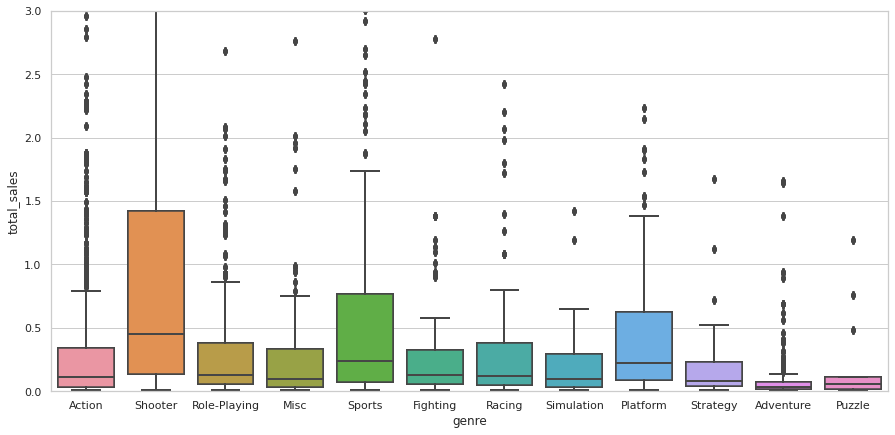

In [38]:
fig, ax = plt.subplots( figsize=(15, 7)) 
for platform, group_data in games.groupby('genre'):
    ax = sns.boxplot(x="genre", y="total_sales", data=games)
    plt.ylim(0, 3)

<div class="alert alert-block alert-info"; style="border-left: 7px solid blue">

Очень неожиданно для меня, но действительно жанр Action , который в общем распределении занимал 1 место по продажам, на самом деле далеко не лучший.
    
По медианным значениям тройка лидеров состоит из жанров Shooter, Sports и Platform со значениями от 0.2 до 0.45 млн.
    
Остальные жанры в общем состоят из мелких игр с низкими продажами и небольшим количество игр, которые "выстрелили".

## Шаг 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

### Самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [39]:
def top_plat_plot1(region_sales, ax):
    pivot = games.groupby('platform').agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    color_dict = {'na_sales': 'b', 'eu_sales': 'g', 'jp_sales': 'r'}
    plot = pivot.plot(kind='bar', ec='black', ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.set_ylim(0,150)
    plot.title.set_size(20)
    plt.title('Самые популярные платформы (топ-5)', size = 20 )

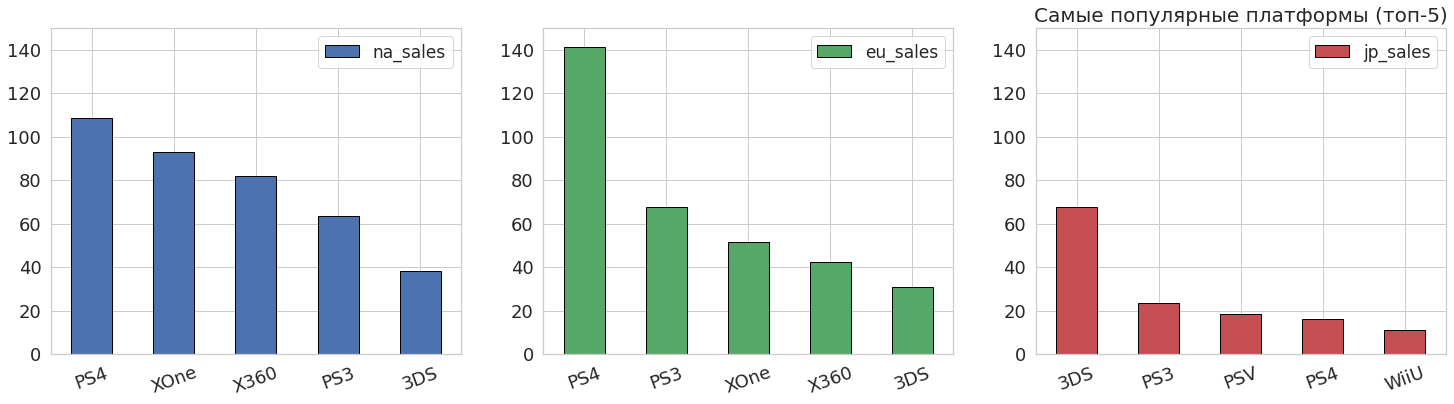

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
plt.title('Самые популярные платформы (топ-5)', size = 20 )
top_plat_plot1( 'na_sales', 0)
top_plat_plot1( 'eu_sales', 1)
top_plat_plot1( 'jp_sales', 2)

<div class="alert alert-block alert-info"; style="border-left: 7px solid blue">

Для актуального периода:

В Северной Америке распределение по местам происходит +- равномерно (разница 10-20). 
    На пером месте PS4, затем Xone, X360, PS3, и немного остатет от всех 3DS.
    
В Европе со значительным отрывом на 1 месте также располагается PS4. Затем с меньшими в 2 раза и более значениями PS3, XOne, X360 и 3DS. 
    
То есть в СА и Европе платформы одни и те же, но с разными местами.
    
В Японии все по-другому. На первом месте со значительным отрывом находится платформа 3DS, которая в СА и Е находится на 5 месте. Однако в пятерку также входят PS3 и PS4, а также PSV. И неожиданно на 5 месте WiiU.

### Самые популярные жанры (топ-5). 

In [41]:
def top_plat_plot2(region_sales, ax):
    pivot = games.groupby('genre').agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    color_dict = {'na_sales': 'b', 'eu_sales': 'g', 'jp_sales': 'r'}
    plot = pivot.plot(kind='bar', ec='black', ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.set_ylim(0,150)
    plot.title.set_size(20)

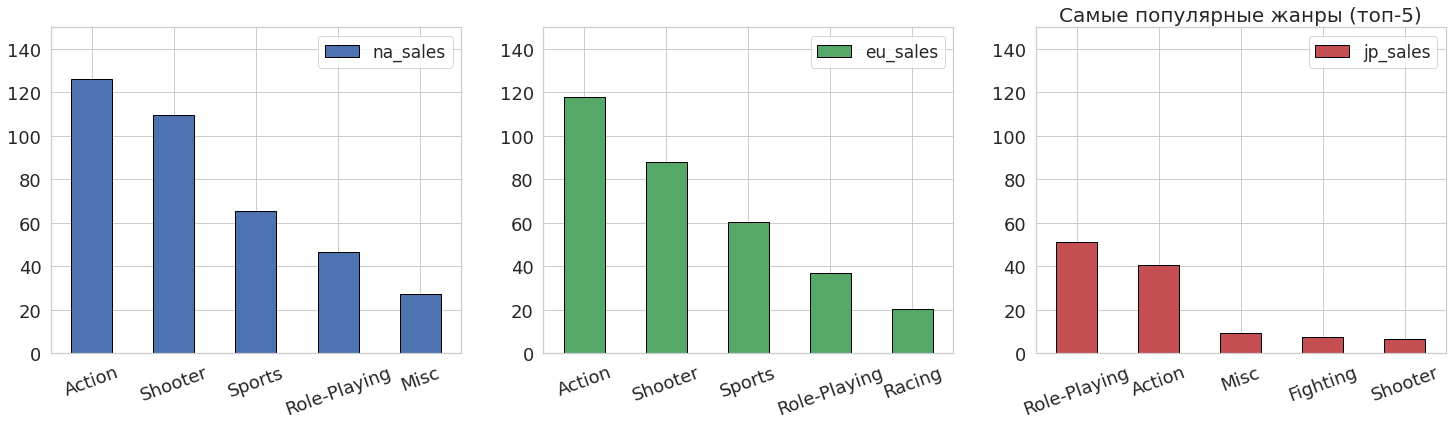

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
plt.title('Самые популярные жанры (топ-5)', size = 20 )
top_plat_plot2( 'na_sales', 0)
top_plat_plot2( 'eu_sales', 1)
top_plat_plot2( 'jp_sales', 2)

<div class="alert alert-block alert-info"; style="border-left: 7px solid blue">

В Северной Америке и Европе самые популярные жанры практически совпадают. Отличаются лишь пятые места. 
Самый популярный жанр - экшны.
    
В Японии же вкусы сильно отличаются от NA и EU, на первом месте стоит жанр Role-Playing, далее экшны и аркады. на 4 месте располагается Fighting. Жанр Shooter находится на последнем месте, хотя он занимает аж 2 место в СА и Европе!

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [43]:
games['rating'] = games['rating'].fillna('Other') #Заменили все NaN на Other

In [44]:
def top_plat_plot3(region_sales, ax):
    pivot = games.groupby('rating').agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)
    color_dict = {'na_sales': 'b', 'eu_sales': 'g', 'jp_sales': 'r'}
    plot = pivot.plot(kind='bar', ec='black', ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.set_ylim(0,175)
    
    plot.title.set_size(20)

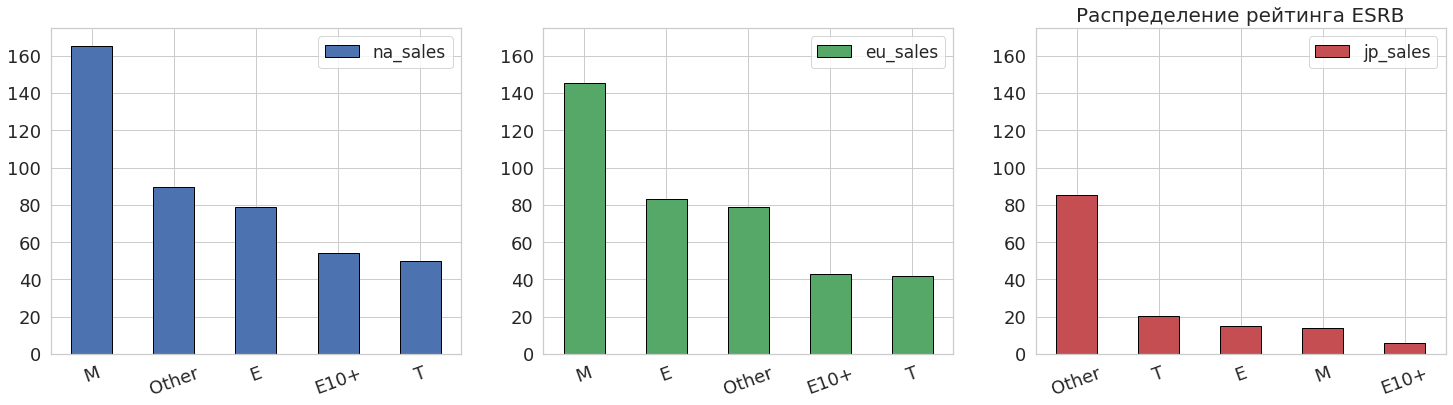

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
plt.title('Распределение рейтинга ESRB', size = 20 )
top_plat_plot3('na_sales', 0)
top_plat_plot3('eu_sales', 1)
top_plat_plot3('jp_sales', 2)

- E: 6+ лет
- M: 17+ лет
- T: 13+ лет
- E10+: 10+ лет
- EC-RP: 'Для всех 3+
- Без рейтинга

<div class="alert alert-block alert-info"; style="border-left: 7px solid blue">

Для Северной Америки и Европы на 1 месте по продажам выходят игры 17+.

Далее идут либо 6+, либо игры без рейтинга. Таким образом у нас очень много продаж, которые вообще без категории. Предполагаю, что это игры 18+, но, конечно, не факт.
    
Меньше всего продаются 10+ и 13+. 
    
В Японии ОЧЕНЬ преобладают продажи игр без рейтинга...
    
Дальше идут 13+,6+, 17+ и 10+.
    
<div class="alert alert-success"; style="border-left: 7px solid green">
    
Да, верно. Здесь стоит заинтересоваться аномалией Японии - весьма законопослушные японцы, почему столько игр без рейтинга? А дело в том, что у них просто свой собственный орган, который присваивает рейтинги, называется CERO. Поэтому производители игр, выпускаемых для местного рынка, не стремятся получать классификацию от американо-канадского ESRB. 
    
</div>

## Шаг 5. Проверим гипотезы

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [46]:
from scipy import stats as st

XOne_sample1 = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
PC_sample2 = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']

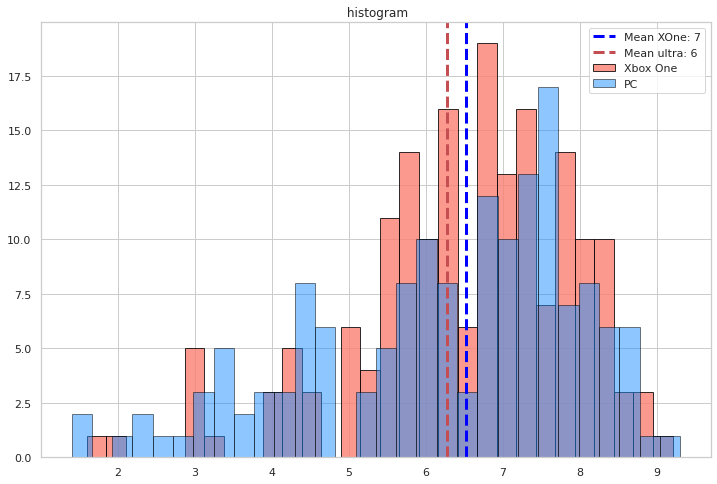

'Дисперсия Xbox One - 1.91;  Дисперсия PC - 3.04'

In [47]:
plt.figure(figsize=(12,8))
plt.hist(XOne_sample1, bins=30, color='salmon', edgecolor='black', alpha=0.8, label = 'Xbox One', density = False)
plt.hist(PC_sample2, bins=30, color='dodgerblue', edgecolor='black', alpha=0.5,label = 'PC', density = False)

plt.axvline(XOne_sample1.mean(), color='blue', linestyle='dashed', linewidth=3
                , label='Mean XOne: {:.0f}'.format(XOne_sample1.mean()))
plt.axvline(PC_sample2.mean(), color='r', linestyle='dashed', linewidth=3
            , label='Mean ultra: {:.0f}'.format(PC_sample2.mean()))


plt.legend()
plt.title(' histogram')
plt.show()
display("Дисперсия Xbox One - {:.2f};  Дисперсия PC - {:.2f}"
      .format(XOne_sample1.var(),  PC_sample2.var()))

#будем считать дисперсии равными.

<div class="alert alert-block alert-info"; style="border-left: 7px solid blue">

Разница почти в 1.5 раза, я бы сказала, что дисперсии отличаются - поэтому equal_var = False
</div>

In [48]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results1 = st.ttest_ind(
    XOne_sample1, 
    PC_sample2,
    equal_var = False)

print('p-значение:', results1.pvalue)

if (results1.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-info"; style="border-left: 7px solid blue">

У нас нет оснований для того, чтобы отвергнуть гипотезу.
    
Средние пользовательские рейтинги платформ Xbox One и PC и правда одинаковые.

</div>

### Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Ho (нулевая гипотеза) - средние оценки пользователей жанров Action и Sports равны;

H1 (альтернативная гипотеза) - средние оценки отличаются между собой.

In [49]:
Action_sample1 = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
Sports_sample2 = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']

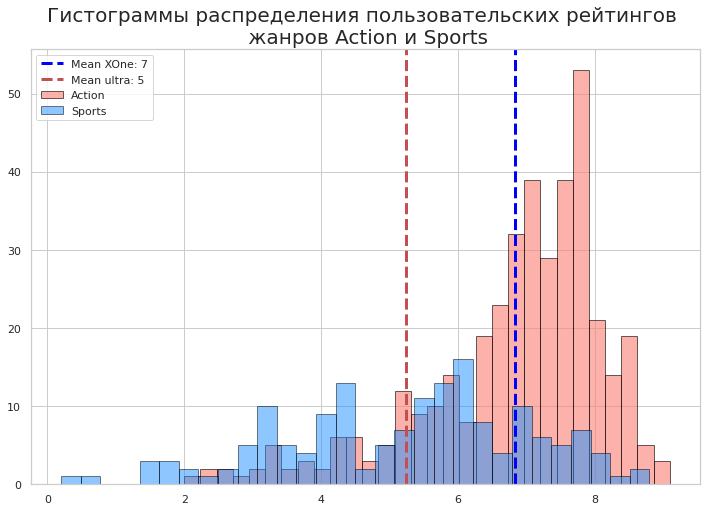

'Дисперсия Xbox One - 1.77;  Дисперсия PC - 3.18'

In [50]:
plt.figure(figsize=(12,8))
plt.hist(Action_sample1, bins=30, color='salmon', edgecolor='black', alpha=0.6, label = 'Action', density = False)
plt.hist(Sports_sample2, bins=30, color='dodgerblue', edgecolor='black', alpha=0.5,label = 'Sports', density = False)

plt.axvline(Action_sample1.mean(), color='blue', linestyle='dashed', linewidth=3
                , label='Mean XOne: {:.0f}'.format(Action_sample1.mean()))
plt.axvline(Sports_sample2.mean(), color='r', linestyle='dashed', linewidth=3
            , label='Mean ultra: {:.0f}'.format(Sports_sample2.mean()))


plt.legend()
plt.title('Гистограммы распределения пользовательских рейтингов \n жанров Action и Sports', size = 20)
plt.show()
display("Дисперсия Xbox One - {:.2f};  Дисперсия PC - {:.2f}"
      .format(Action_sample1.var(),  Sports_sample2.var()))

Дисперсии отличаются почти в 2 раза, будет считать их разными. В equal_var поставим False.

In [51]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results2 = st.ttest_ind(
    Action_sample1, 
    Sports_sample2,
    equal_var = False)

print('p-значение:', results2.pvalue)

if (results2.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Уровень значимости очень маленький, значит отвергаем нулевую гипотезу.

Таким образом, оценки пользователей игр жанров Action и Sports разные. Значит наша исходная гипотеза подтверилась!

<div class="alert alert-block alert-info"; style="border-left: 7px solid blue">

А здесь нулевая гипотеза отвергнута, и ты прнимаешь альтернативную. Подтвердилось предположение о различии рейтингов. Оценки пользователей игр жанров Action и Sports разные.
    
</div>

## Шаг 6. Общий вывод

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<b>В ходе проделанной работы было выполнено:</b>

- Просмотрена таблица, выявлены аномалии и пропущенные значения.
- Проведена предобработка таблицы: изменение названия столбцов, выборка данных, изменение типов данных и т.д.
- Проведен анализ по данным и подготовлены актуальные данные.
- Составлены портреты пользователей для отдельных регионов продаж.
- Выполнены проверки гипотез.

<b>В результате исследовательского анализа данных:</b>

- Было обнаружено, что резкий рост выпуска игр приходится на 1994 и 2000 гг., а пик на 2008-2009 гг.
- Характерный срок жизни платформы - 9-10 лет, поэтому оставили данные с 2006 по 2016 гг.
- Рынок игр находится в стадии спада.
- 3 потенциально прибыльных платформ на данный момент (2016 год) - PS4, XOne, 3DS.
- Наибольшие медианные продажи у платформ PS3,DS и X360.
- Оценки критиков несильно влияют на общие продажи, оценки пользователей не влияют практически совсем.
- Оценки критиков в достаточной мере влияют на оценки пользователей.
- Лучше всего покупают игры жанра Action, Sports, Shooter.

<b>В результате изучения пользователей регионов:</b>

Если разрабатывать игры для Северной Америки и Европы нужно ориентироваться на возрастную категорию 6+ и 17+ в жанрах экшен и спорт на платформах Xbox 360, PS3 и Wii.

Для Японии нужно ориентироваться на возрастную категорию 6+ и 13+ в жанре Role-Playing на платформах DS или 3DS.

<b>В результате проверки гипотез</b>

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза не подтвердилась.
Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза подтвердилась.

<b>ИТОГ:</b>
    
Для планирования рекламных кампаний необходимо учитывать несколько принципов:
- какая платформа создает игру (у платформ-лидеров есть своя устоявшаяся аудитория, также у них есть больше возможности улучшать технические параметры)
- какого жанра игра (топ-3: Action, Sports, Shooter)
- для какой аудитории она создается (В Северной Америке и Европе вкусы похожие, в то время как Япония абсолютно им не соответствует)
- новизна платформ (наиболее технически развиты платформы позволят создать лучший продукт и продержится свой полный срок жизни 9-10 лет)
- учет влияния критиков (игры, у которых высокая оценка критиков как правило лучше продаются, а также оценка пользователей прямо зависит от оценки критиков)

<div class="alert alert-block alert-info"; style="border-left: 7px solid blue">

Итак, напишу новый итог на основе обновленных данных.
    
- За период с 2013 по 2016 год по суммарному количеству проданных игр лидирует платформа PS4 с продажами более 300 млн копий. Следом идет топовая четверка - PS3, XOne, 3DS, X360, продавшая от 140 до 180 млн копий.

- По медианным значениям: Наибольшие значения продаж у платформ X360, XOne, PS4, WiiU и Wii. Они варьируются от 0,18 до 0,27 млн проданных копий. У остальных платформ <= 0.15 млн.

- Максимальные значения продаж определенных игр у платформ доходят до 10-20 млн, таких как PS3, X360, PS4, 3DS.

- Корреляция между critic_score и user_score равна 0.63, что говорит о влиянии мнения критиков на простых пользователей.

- Топ-3 жанров по более высоким значениям продаж, попавших в межквартильный размах - Shooter, Sports и Platform с медианными значениями от 0.2 до 0.45 млн.

- В Северной Америке на платформу PS4 приходтся около 110 млн продаж, в Европе 140 млн, а в Японии большинство продаж досталось платорме 3DS(70 млн).

- В Северной Америке и Европе преобладают жанры Action, Shooter и Sports. В Японии - Role-playing.

- В СА и Европе большинство игр 17+, а в Японии и вовсе без рейтинга.

- Проверка 1 гипотезы показала, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Проверка 2 гипотезы показала, что оценки пользователей игр жанров Action и Sports разные.

</div>